In [1]:
from scipy import stats

In [2]:
from cprior.models.bernoulli import BernoulliModel
from cprior.models.bernoulli import BernoulliMVTest
from cprior.experiment.base import Experiment

In [3]:
modelA = BernoulliModel(name="control", alpha=1, beta=1)
modelB = BernoulliModel(name="variation", alpha=1, beta=1)
modelC = BernoulliModel(name="variation", alpha=1, beta=1)
modelD = BernoulliModel(name="variation", alpha=1, beta=1)

abtest = BernoulliMVTest({"A": modelA, "B": modelB, "C": modelC, "D": modelD})

In [12]:
experiment = Experiment(name="CTR", test=abtest, stopping_rule="probability_vs_all",
                        epsilon=0.99, min_n_samples=1000, max_n_samples=None)

Describe

In [13]:
experiment.describe()

  Experiment: CTR
    Bayesian model:                bernoulli-beta
    Number of variants:                         4

    Options:
      stopping rule            probability_vs_all
      epsilon                             0.99000
      min_n_samples                          1000
      max_n_samples                       not set

    Priors:

         alpha  beta
      A      1     1
      B      1     1
      C      1     1
      D      1     1
  -------------------------------------------------



Generate new data and update models

In [14]:
with experiment as e:
    while not e.termination:
        data_A = stats.bernoulli(p=0.0223).rvs(size=25)
        data_B = stats.bernoulli(p=0.1128).rvs(size=15)
        data_C = stats.bernoulli(p=0.0751).rvs(size=35)
        data_D = stats.bernoulli(p=0.0280).rvs(size=15)

        e.run_update(**{"A": data_A, "B": data_B, "C": data_C, "D": data_D})
        
    print(e.termination, e.status)

True winner B


Plotting

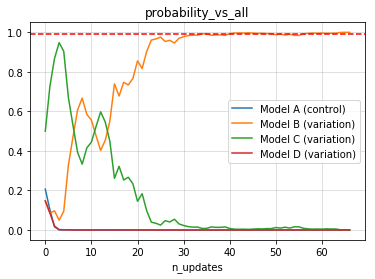

In [15]:
experiment.plot_metric()

Summary

In [16]:
experiment.summary()

,name,probability,expected_loss,improvement,probability_vs_all,expected_loss_vs_all,improvement_vs_all,n_samples
A,control,-,-,-,0.00%,0.0881716,-572.15%,1675
B,variation,100.00%,1.30573e-27,84.43%,99.94%,1.63007e-06,32.00%,1005
C,variation,100.00%,5.95894e-21,76.97%,0.06%,0.0339692,-49.16%,2345
D,variation,97.89%,4.26579e-05,40.01%,0.00%,0.0764664,-288.51%,1005


Statistics

In [17]:
experiment.stats()

,A,B,C,D
count,1675.000000,1005.000000,2345.000000,1005.000000
mean,0.015522,0.103483,0.069936,0.026866
std,0.123655,0.304740,0.255094,0.161771
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


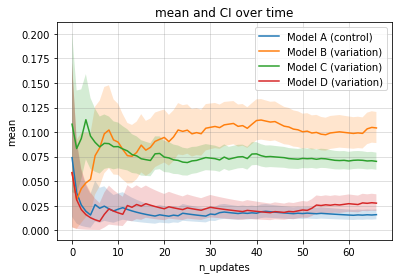

In [18]:
experiment.plot_stats()